In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [16]:
d_acci = pd.read_csv("C:\\Users\\bbogd\\OneDrive\\Desktop\\data\\fyp2021p01g04-main\\data\\raw\\Road Safety Data - Accidents 2019.csv")
d_cas = pd.read_csv('C:\\Users\\bbogd\\OneDrive\\Desktop\\data\\fyp2021p01g04-main\\data\\raw\\Road Safety Data - Casualties 2019.csv')
d_veh = pd.read_csv('C:\\Users\\bbogd\\OneDrive\\Desktop\\data\\fyp2021p01g04-main\\data\\raw\\Road Safety Data- Vehicles 2019.csv')


In [26]:
mask = d_acci['Local_Authority_(District)'] == 200  #mask for the city
brad_acc = d_acci[mask] # new table only with bradford 

brad_acc_index = brad_acc['Accident_Index'] # index primary key in every table
brad_casualties = d_cas[d_cas['Accident_Index'].isin(brad_acc_index)]  
brad_vehicle = d_veh[d_veh['Accident_Index'].isin(brad_acc_index)]

In [33]:
type(brad_vehicle)
brad_casualties
age_band = brad_casualties['Age_Band_of_Casualty']

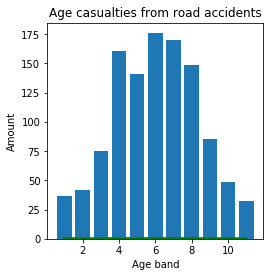

In [55]:
categories, counts = np.unique(age_band, return_counts=True)  #bar char for age range casualties
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0,0,1,1])

plt.bar(categories, counts)
axes.set_title('Age casualties from road accidents')
axes.set_xlabel('Age band')
axes.set_ylabel('Amount')

overlay = np.linspace(categories.min(), categories.max(), 100)
mean, std = norm.fit(categories)
pdf = norm.pdf(overlay, mean, std)
axes.plot(overlay, pdf, 'g', linewidth=3)
    
